In [1]:
"""
This file contains a coordinate convertor, it has 3 (useful) methods


"""
import numpy as np
import matplotlib.pyplot as plt
from assets.ROI import ROI
from assets.img_calculs import seg_kmeans, seg_canny, get_boxes_contours, seg_hsv_threshold
from assets.img_calculs import denoise_bilatera, denoise_erode
from assets.img2np import np_from_tif, np_from_jpg
import os

TIF_DIR = '/home/yutong/TissueNet/data/tif_images/'
JPG_DIR = '/home/yutong/TissueNet/data/downsampled_images/'


/home/yutong/TissueNet/data/downsampled_images/C01_B108_S01.jpg


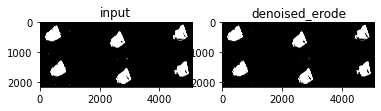

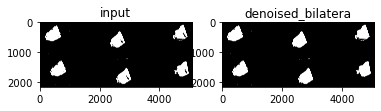

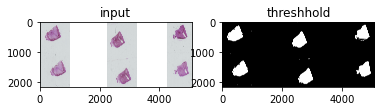

Filted -62 boxes


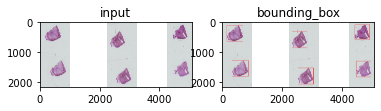

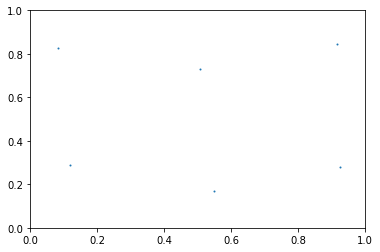

Finished


In [3]:
FILE_NAME = 'C01_B108_S01'

TIF_PATH = os.path.join(TIF_DIR, FILE_NAME + '.tif')
JPG_PATH = os.path.join(JPG_DIR, FILE_NAME + '.jpg')

img = np_from_jpg(JPG_PATH)
print(JPG_PATH)
# img = np_from_tif('../data/tif_images/C01_B108_S01.tif', 7)
mask = seg_hsv_threshold(img, disp=True, denoise_f=(denoise_erode, denoise_bilatera))
boxes, contours, _ = get_boxes_contours(img, mask, disp=True, thresh=200)
R = ROI()
R.set_boxes(name='C01_B108_S01.tif', W=img.shape[1], H=img.shape[0], boxes=boxes, coordinate='lu')
R.plot('C01_B108_S01.tif')
B = R.get_boxes_normalized('C01_B108_S01.tif', 'lu')
print('Finished')

In [4]:
print(len(B))
print(B)

6
[[0.49803304 0.70539033 0.09933124 0.24907063]
 [0.87804878 0.60130112 0.09559402 0.24256506]
 [0.06490952 0.58968401 0.10739575 0.24674721]
 [0.4559402  0.14172862 0.10129819 0.25325279]
 [0.0304878  0.05065056 0.10778914 0.24628253]
 [0.86703383 0.03996283 0.09775767 0.2267658 ]]
